In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,09-04-2019,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,No info,3943.0
1,IndiGo,03-06-2019,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,No info,4823.0
2,Jet Airways,09-06-2019,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,In-flight meal not included,3210.0
3,Multiple carriers,27-05-2019,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005.0
4,Air India,06-06-2019,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0


In [4]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,SpiceJet,12-05-2019,Kolkata,Banglore,15:05,20:20,5h 15m,1 stop,No info
1,Air India,15-03-2019,Delhi,Cochin,18:05,21:10,3h 5m,non-stop,No info
2,Jet Airways,24-06-2019,Delhi,Cochin,11:45,25-06-2021 04:25,16h 40m,2 stops,No info
3,SpiceJet,21-06-2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,No info
4,IndiGo,27-04-2019,Kolkata,Banglore,14:25,16:55,2h 30m,non-stop,No info


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          8533 non-null   object 
 1   Date_of_Journey  8533 non-null   object 
 2   Source           8533 non-null   object 
 3   Destination      8533 non-null   object 
 4   Dep_Time         8533 non-null   object 
 5   Arrival_Time     8533 non-null   object 
 6   Duration         8533 non-null   object 
 7   Total_Stops      8533 non-null   object 
 8   Additional_Info  8533 non-null   object 
 9   Price            8533 non-null   float64
dtypes: float64(1), object(9)
memory usage: 666.8+ KB


In [6]:
test_data['Total_Stops'].value_counts()

1 stop          1124
non-stop         698
2 stops          302
3 or 4 stops      10
Name: Total_Stops, dtype: int64

In [7]:
train_data['Duration'].value_counts()

2h 50m     432
1h 30m     312
2h 55m     282
2h 35m     271
2h 45m     263
          ... 
4h 10m       1
42h 5m       1
29h 10m      1
30h 25m      1
12h 50m      1
Name: Duration, Length: 364, dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d-%m-%Y").dt.day

In [11]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d-%m-%Y").dt.month


In [12]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [14]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [15]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [16]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [17]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [18]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,No info,3943.0,9,4,4,0,6,50,2,50
1,IndiGo,Banglore,Delhi,non-stop,No info,4823.0,3,6,8,30,11,20,2,50
2,Jet Airways,Mumbai,Hyderabad,non-stop,In-flight meal not included,3210.0,9,6,19,35,21,5,1,30
3,Multiple carriers,Delhi,Cochin,1 stop,No info,7005.0,27,5,12,50,21,0,8,10
4,Air India,Delhi,Cochin,2 stops,No info,13381.0,6,6,6,50,7,40,24,50


In [19]:
train_data["Airline"].value_counts()

Jet Airways          3073
IndiGo               1641
Air India            1401
Multiple carriers     953
SpiceJet              654
Vistara               384
Air Asia              256
GoAir                 157
OTHERS                 14
Name: Airline, dtype: int64

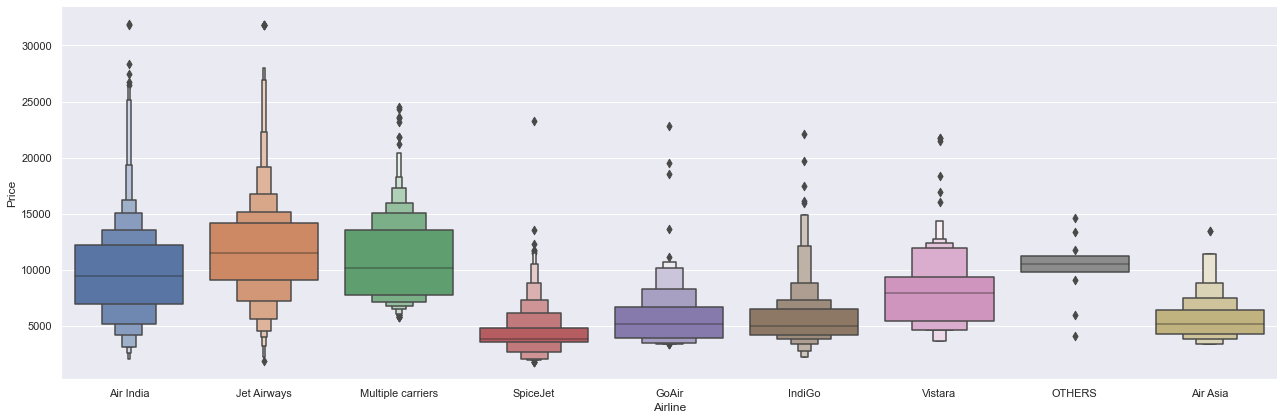

In [20]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [21]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_OTHERS,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0


In [22]:
train_data["Source"].value_counts()

Delhi       3619
Kolkata     2291
Banglore    1748
Mumbai       566
Chennai      309
Name: Source, dtype: int64

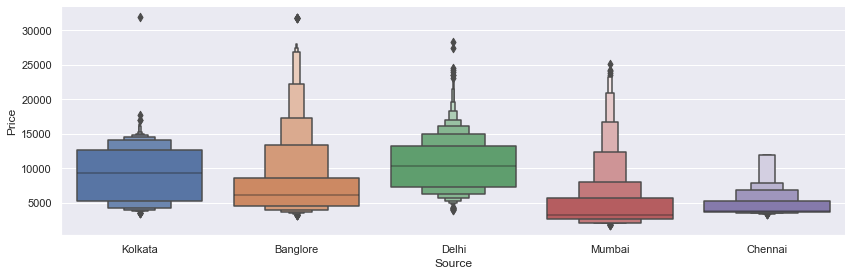

In [23]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


In [24]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [25]:
train_data["Destination"].value_counts()

Cochin       3619
Banglore     2291
Delhi        1018
New Delhi     730
Hyderabad     566
Kolkata       309
Name: Destination, dtype: int64

In [26]:

# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [27]:

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Additional_Info"], axis = 1, inplace = True)

In [28]:

train_data["Total_Stops"].value_counts()

1 stop          4490
non-stop        2793
2 stops         1214
3 or 4 stops      36
Name: Total_Stops, dtype: int64

In [29]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 or 4 stops":3}, inplace = True)

In [30]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [31]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,Delhi,0,3943.0,9,4,4,0,6,...,0,0,0,0,0,0,1,0,0,0
1,IndiGo,Banglore,Delhi,0,4823.0,3,6,8,30,11,...,0,0,0,0,0,0,1,0,0,0
2,Jet Airways,Mumbai,Hyderabad,0,3210.0,9,6,19,35,21,...,0,0,0,0,1,0,0,1,0,0
3,Multiple carriers,Delhi,Cochin,1,7005.0,27,5,12,50,21,...,0,0,1,0,0,1,0,0,0,0
4,Air India,Delhi,Cochin,2,13381.0,6,6,6,50,7,...,0,0,1,0,0,1,0,0,0,0


In [32]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [33]:
data_train.shape

(8533, 27)

In [34]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,SpiceJet,12-05-2019,Kolkata,Banglore,15:05,20:20,5h 15m,1 stop,No info
1,Air India,15-03-2019,Delhi,Cochin,18:05,21:10,3h 5m,non-stop,No info
2,Jet Airways,24-06-2019,Delhi,Cochin,11:45,25-06-2021 04:25,16h 40m,2 stops,No info
3,SpiceJet,21-06-2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,No info
4,IndiGo,27-04-2019,Kolkata,Banglore,14:25,16:55,2h 30m,non-stop,No info


In [35]:
# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d-%m-%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d-%m-%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [36]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [37]:
# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [38]:
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

In [39]:
Source = pd.get_dummies(test_data["Source"], drop_first= True)

In [40]:
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

In [41]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop([ "Additional_Info"], axis = 1, inplace = True)

In [42]:
# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 or 4 stops":3}, inplace = True)

In [43]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [44]:

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [45]:

data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,12,5,15,5,20,20,5,15,0,...,0,0,0,1,0,0,0,0,0,0
1,0,15,3,18,5,21,10,3,5,1,...,0,0,1,0,0,1,0,0,0,0
2,2,24,6,11,45,4,25,16,40,0,...,0,0,1,0,0,1,0,0,0,0
3,0,21,6,9,0,11,25,2,25,0,...,0,0,0,1,0,0,0,0,0,0
4,0,27,4,14,25,16,55,2,30,0,...,0,0,0,1,0,0,0,0,0,0


# FEATURE SELECTION

In [46]:

data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_OTHERS',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [47]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,9,4,4,0,6,50,2,50,0,...,0,0,0,0,0,0,1,0,0,0
1,0,3,6,8,30,11,20,2,50,0,...,0,0,0,0,0,0,1,0,0,0
2,0,9,6,19,35,21,5,1,30,0,...,0,0,0,0,1,0,0,1,0,0
3,1,27,5,12,50,21,0,8,10,0,...,0,0,1,0,0,1,0,0,0,0
4,2,6,6,6,50,7,40,24,50,1,...,0,0,1,0,0,1,0,0,0,0


In [48]:
y = data_train.iloc[:, 1]
y.head()


0     3943.0
1     4823.0
2     3210.0
3     7005.0
4    13381.0
Name: Price, dtype: float64

In [49]:
data_train['Total_Stops'].value_counts()

1    4490
0    2793
2    1214
3      36
Name: Total_Stops, dtype: int64

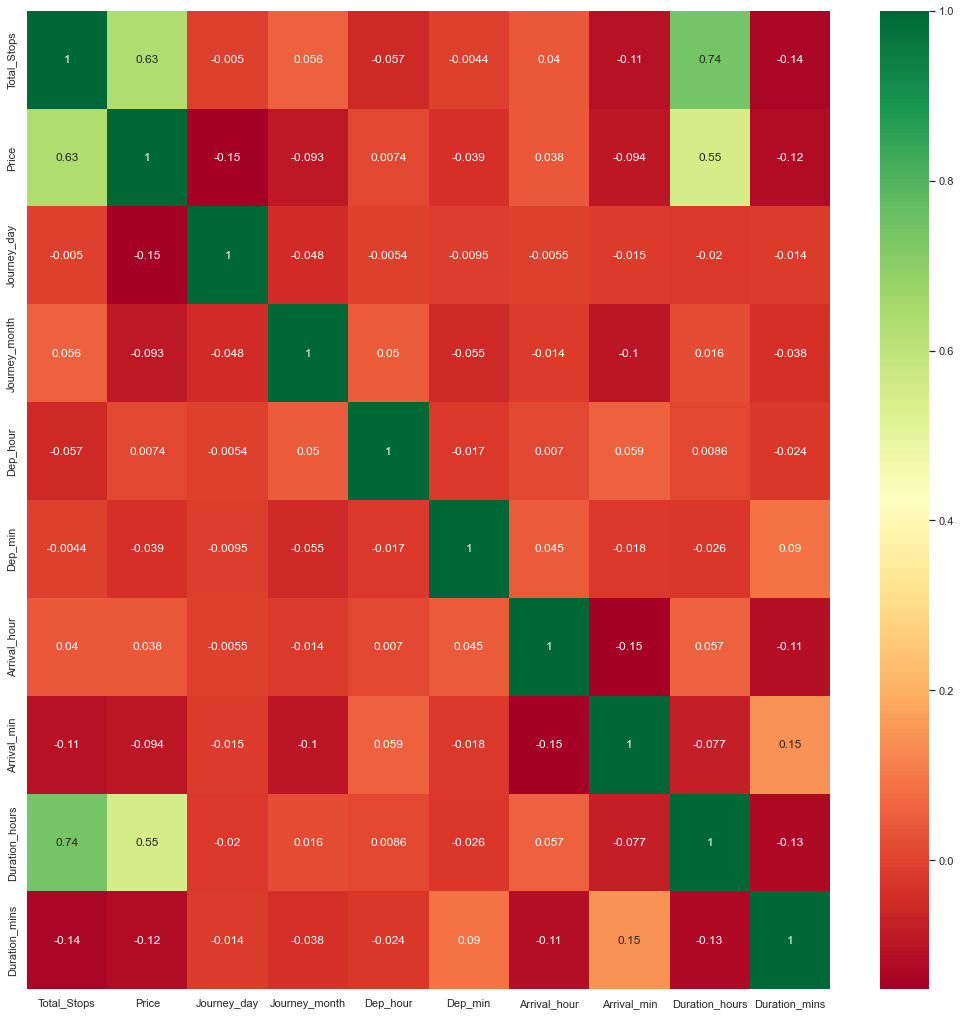

In [50]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [51]:

# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[0.25644218 0.15498924 0.05692436 0.02417494 0.02574132 0.02196062
 0.01907204 0.13637981 0.01570145 0.0139184  0.00427897 0.02374555
 0.1525883  0.005796   0.00517765 0.00054644 0.00912782 0.00475724
 0.00829829 0.0090529  0.01745554 0.00931942 0.00049626 0.02405525]


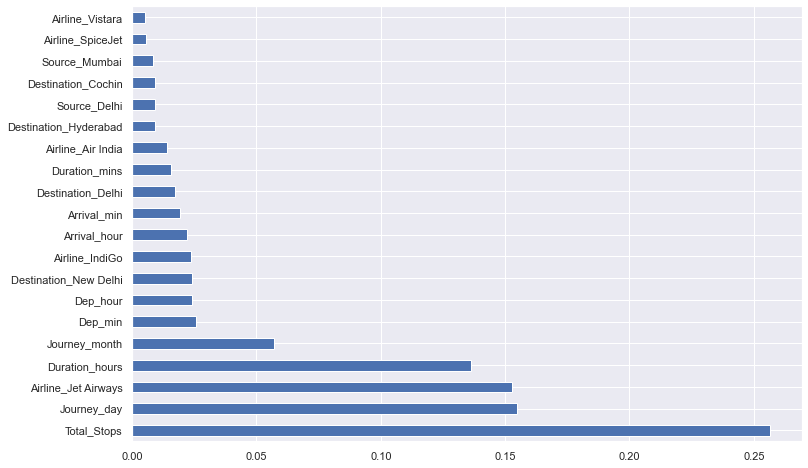

In [53]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
y_pred = reg_rf.predict(X_test)

In [57]:
reg_rf.score(X_train, y_train)

0.9598074479203631

In [58]:
reg_rf.score(X_test, y_test)

0.8346047929311332

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


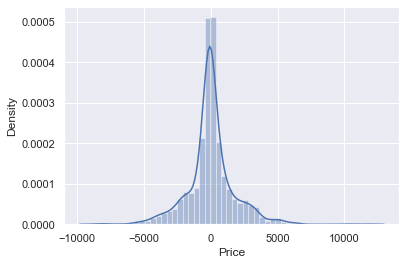

In [59]:

sns.distplot(y_test-y_pred)
plt.show()

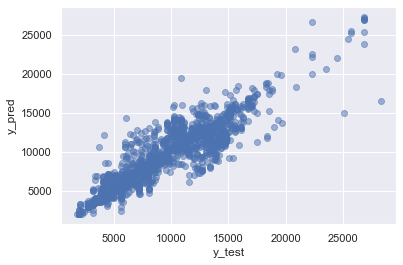

In [60]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [61]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1136.9356976389977
MSE: 3113041.2789433785
RMSE: 1764.3812736887055


In [63]:
metrics.r2_score(y_test, y_pred)

0.8346047929311332

# Hyperparametric tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [66]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [67]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [68]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [70]:
prediction = rf_random.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


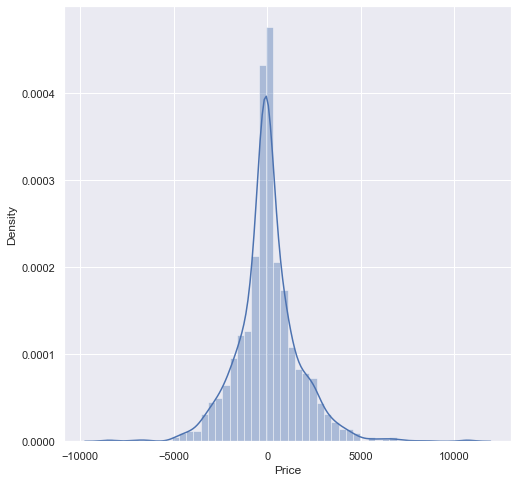

In [71]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

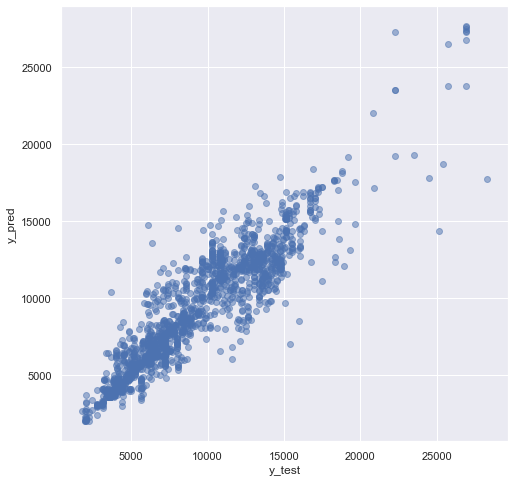

In [72]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1143.1168790576098
MSE: 2852981.7580835703
RMSE: 1689.0771912744456


In [74]:
prediction

array([13992.97124756, 12087.31194339,  7321.31547906, ...,
       12927.20132053,  5532.95804058,  6446.33259615])

In [75]:
price = []
for n in prediction:
    n = n.round()
    price.append(n)

In [76]:
df = pd.DataFrame(price)

In [77]:
df.to_csv('predicted_flight_price.csv')